### Bitwise

#### 基础
* **&** 按位与
    * 如果两个相应的二进制位都为1，则该位的结果值为1，否则为0
    * 可以看成每个位置相乘  
* **|** 按位或
    * 两个相应的二进制位中只要有一个为1，该位的结果值为1
* **^** 按位异或
    * 若参加运算的两个二进制位值相同则为0，否则为1
    * n ^ n = 0
    * n ^ 0 = n
    * x ^ y == y ^ x 交换律
    * (x ^ y) ^ z = x ^ (y ^ z) 结合律
    * x ^ y = z => x ^ z = y; y ^ z = x
* **~** 取反
    * ~是一元运算符，用来对一个二进制数按位取反，即将0变1，将1
* **<<** 左移
    * 用来将一个数的各二进制位全部左移N位，右补0
* **>>** 右移
    * 将一个数的各二进制位右移N位，移到右端的低位被舍弃，对于无符号数， 高位补0

In [131]:
import random
a = random.randint(0,1000)
b = random.randint(0,1000)
c = a ^ b
print(a, b ^ c)

396 396


#### 技巧
##### 判断奇偶

In [23]:
import random
a = random.randint(1, 1000) * 2 + 1
# odd
assert (a & 1 == 1), 'wrong'
# even
assert ((2 * a) & 1 == 0), 'wrong'

##### 交换两个数

In [29]:
x, y = random.randint(1, 1000), random.randint(1, 1000)
print('交换以前', x, y)
x = x ^ y   
y = x ^ y  # y = (x ^ y) ^ y  =  x ^ (y ^ y) = x ^ 0 = x
x = x ^ y  # x = x ^ (x ^ y) = y
# x, y = y, x
print('交换之后', x, y)

交换以前 379 291
交换之后 291 379


##### 找出没有重复的数
所有数字出现两次 只有一个出现一次
时间复杂度为 O(n)，空间复杂度为 O(1)

In [33]:
lists = [1,2,3,4,5,1,2,3,4]
num = 0
for l in lists:
    num ^= l
assert (num == 5), 'wrong'

#### m的n次方
时间复杂度近为 O(logn)

例子： n = 13

m ** 1101 = m ** 0001 * m ** 0100 * m ** 1000

sums = 1

temp = m

1101 -> 最后一位为1 (n & 1 == 1): 因此sums *= temp 

1101 -> 倒数第二位 （n >> 1 -< 110, n & 1 ==1):因此 sums *= temp * temp

In [44]:
m = random.randint(1, 1000)
n = random.randint(1, 1000)
def cal_power(m, n):
    tmp = m
    sums = 1
    while n != 0:
        if n & 1 == 1:
            sums *= tmp
        tmp *= tmp;
        n = n >> 1
    return sums
assert (cal_power(m,n) == m ** n), 'wrong'

#### 找出不大于N的最大的2的幂指数


In [45]:
A = [2,4,8,16,32]
for a in A:
    print(bin(a)[2:])

10
100
1000
10000
100000


#### 用于消去x的最后一位的1
m & (m-1)

In [61]:
m = random.randint(1, 1000)
print('before, m = ', bin(m)[2:])
print('m-1 , m-1 = ', bin((m-1))[2:])
print('after , m = ', bin(m & (m-1))[2:])

before, m =  100011
m-1 , m-1 =  100010
after , m =  100010


##### 用O(1)时间检测整数n是否是2的幂次

In [63]:
def two_power(n):
    return True if n & (n - 1) == 0 else False
for n in [5,8,1024]:
    print('n = ', n, two_power(n))

n =  5 False
n =  8 True
n =  1024 True


##### 将整数A转换为B，需要改变多少个bit位

In [116]:
m = 35
n = 15
print('m =', m, bin(m)[2:])
print('n =', n, '00' + bin(n)[2:])
def cal_bits(m, n):
    xor = m ^ n
    count = 0
    while xor != 0:
        if xor & 1 == 1:
            count += 1
        xor >>= 1
    return count
assert (cal_bits(m, n) == 3), 'wrong'

m = 35 100011
n = 15 001111


#### 使用二进制进行子集枚举
给定一个含不同整数的集合，返回其所有的子集

思路就是使用一个正整数二进制表示的第i位是1还是0，代表集合的第i个数取或者不取。所以从0到2n-1总共2n个整数，正好对应集合的2^n个子集。

例如

如果 S = [1,2,3]，有如下的解：

0. 000 {}

1. 001 {1}

2. 010 {2}

3. 011 {1,2}

4. 100 {3}

5. 101 {1,3}

6. 110 {2,3}

7. 111 {1,2,3}

In [123]:
# backtrack
def combination(i, S, temp, com):
    if len(temp) == len(S):
        return
    else:
        com.append(temp)
        for idx in range(i, len(S)):
            combination(idx + 1, S, temp + [S[idx]], com)

In [121]:
def combination(nums):
    com = []
    for i in range(2 ** len(nums)):
        temp = []
        for j in range(len(nums)):
            if i >> j & 1 == 1:
                temp.append(nums[j])
            if i >> j == 0:
                break
        com.append(temp)
    return com

In [124]:
S = [1,2,3,4]
com = []
combination(0, S, [], com)
print(com)

[[], [1], [1, 2], [1, 2, 3], [1, 2, 4], [1, 3], [1, 3, 4], [1, 4], [2], [2, 3], [2, 3, 4], [2, 4], [3], [3, 4], [4]]


#### a^b^b=a

##### 只有一个数出现一次，剩下都出现三次，找出出现一次的。
Given [1,1,2,3,3,3,2,2,4,1] return 4

因为数是出现三次的，也就是说，对于每一个二进制位，如果只出现一次的数在该二进制位为1，那么这个二进制位在全部数字中出现次数无法被3整除。
模3运算只有三种状态：00,01,10，因此我们可以使用两个位来表示当前位%3，对于每一位，我们让Two，One表示当前位的状态，B表示输入数字的对应位，Two+和One+表示输出状态。

In [126]:
def singleNumber(A):
    ones = 0  #记录只出现过1次的bits
    twos = 0  #记录只出现过2次的bits
    for i in range(len(A)):
        t = A[i]
        twos |= ones&t  #要在更新ones前面更新twos
        ones ^= t;
        threes = ones&twos  #ones和twos中都为1即出现了3次
        ones &= ~threes  #抹去出现了3次的bits
        twos &= ~threes
    return ones
A = [1,1,2,1,2,3,2]
singleNumber(A)

3

##### 数组中，只有两个数出现一次，剩下都出现两次，找出出现一次的

In [136]:
def find_two_one(A):
    xor = 0
    for i in range(len(A)):
        xor ^= A[i]
    xor_c = xor
    pos = 1
    while xor_c > 0:
        if xor_c & 1 == 1:
            break
        else:
            xor_c >>= 1
            pos += 1
    xor_half = 0
    for i in range(len(A)):
        if (A[i] >> pos) & 1 == 1:
            xor_half ^= A[i]
    x = xor_half
    y = x ^ xor
    return x, y
A = [2,2,3,4,4,5,]    
print(find_two_one(A))      

(5, 3)


#### 不用加减法符号做加减法
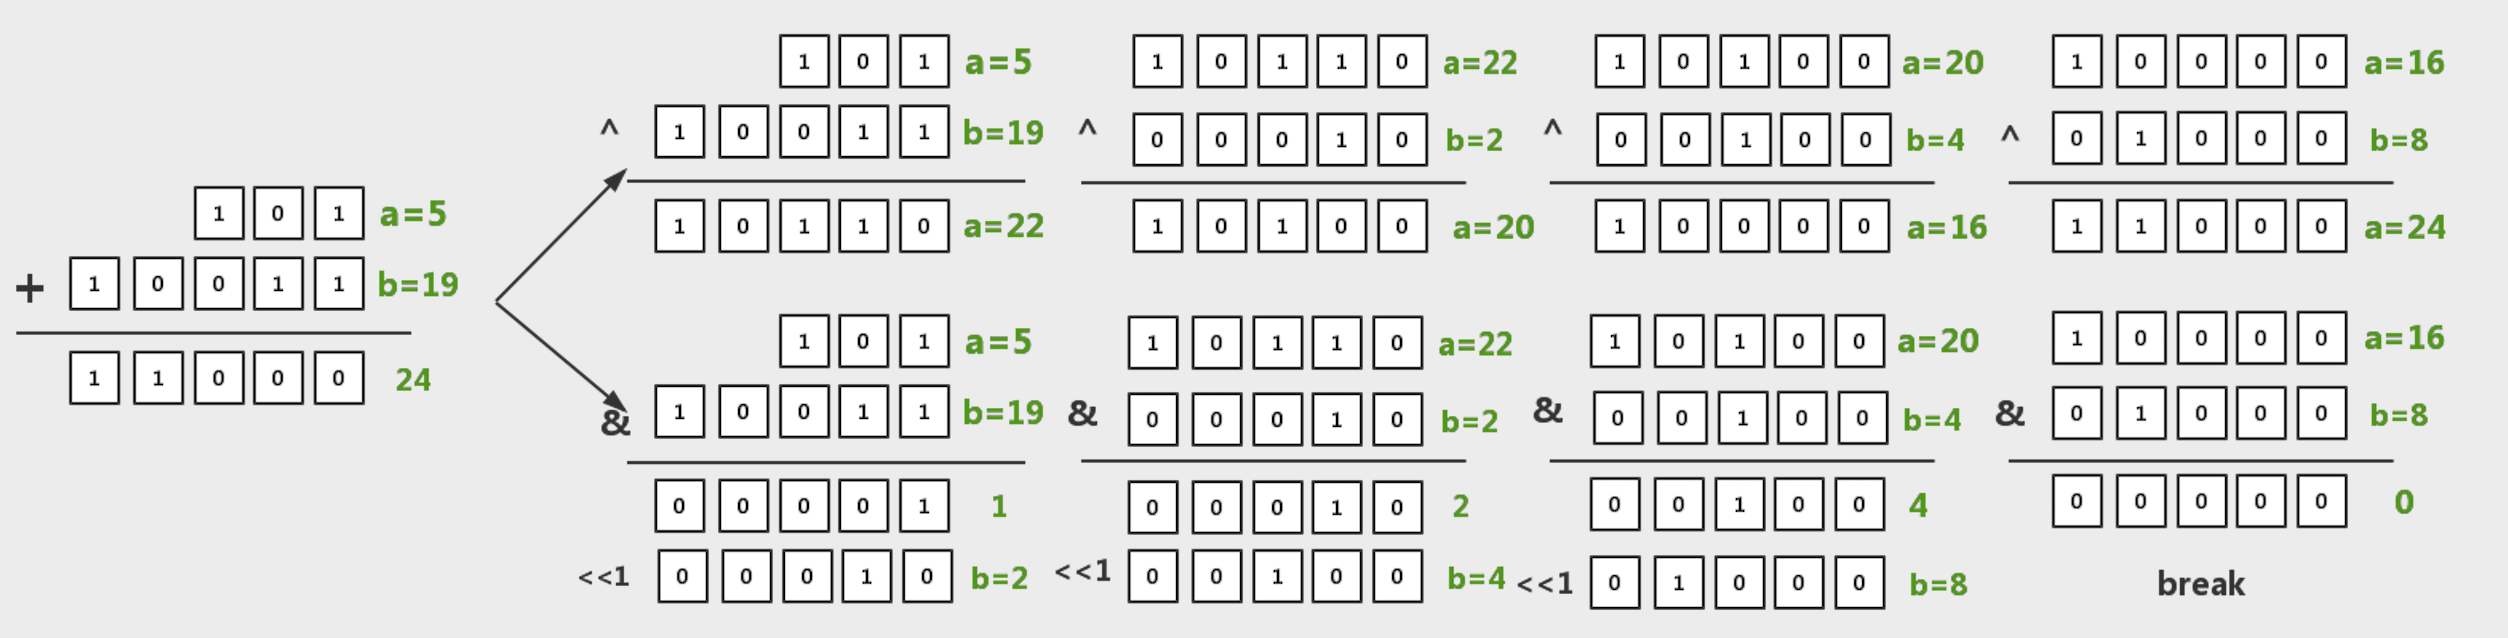

In [39]:
# a * b > 0 或者 负数比正数绝对值大
def getSum(a, b) -> int:
        while b != 0:
            a, b = a ^ b, (a & b) << 1
        return a
a, b = 199, -200
assert(getSum(a, b) == (a + b)), 'wrong'
a, b = 0, 99
assert(getSum(a, b) == (a + b)), 'wrong'


In [40]:
def getSum(a: int, b: int) -> int:
    
    def add(a, b):
        while b != 0:
            a, b = a ^ b, (a & b) << 1
        return a        
    
    if b < 0:
            a, b = b, a    
    if a * b >= 0 or abs(a) > b:
        return add(a, b)
    else:
        if abs(a) == b:
            return 0
        else:
            return -1 * add(add(~a, 1), add(~b, 1))
a, b = -6, 300
assert(getSum(a, b) == (a + b)), 'wrong'